In [4]:
from algos import *
import algos as alg
from write import *
import cv2 as cv
from main import *

In [5]:
if __name__ == '__main__':
    collect = thread_party(enhance, lambda img: global_thresh(img, 130))
    print(count_successes_fails(collect))
[x/300 for x in count_successes_fails(collect)]

NameError: name 'alg' is not defined

In [4]:
[x/300 for x in count_successes_fails(collect)]

[0.10666666666666667, 0.07, 0.41, 0.43, 0.09]

## TESTING HEREAFTER

In [20]:
def dflatten(l):
    return [item for sublist in [item for sublist in l for item in sublist] for item in sublist]
count_sucesses_fails(dflatten(collect))

16

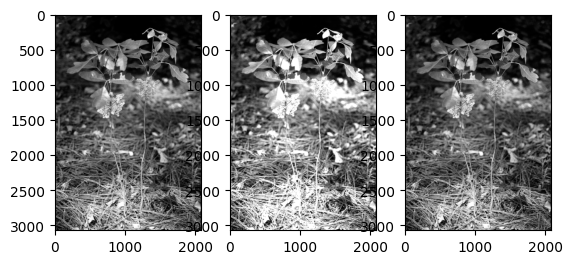

In [29]:
test(
    gray_oak_atln,
    [lambda img: magic(img)[0], lambda img: magic(img)[1], identity],
)


In [32]:
multi_save(
    "midterm",
    [("oak_atln", gray_oak_atln)],
    [
        # ("t-130", lambda img: global_thresh(img, 130)),
    ],
)


In [62]:
def loop(iimg, feats=False):
    successes = []
    f = combine_enh_seg
    for lst, name in [
        (test_image_numbers, p)
        for p in [
            "poison_ivy",
            "poison_ivy_west",
            "poison_oak_west",
            "poison_oak_east",
            "poison_sumac",
            "bear_oak",
            "boxelder",
            "fragrant_sumac",
            "jack_in_the_pulpit",
            "virginia_creeper",
        ]
    ]:
        if name.__contains__("poison"):  # type: ignore
            for x in lst:
                img = cv2.cvtColor(
                    cv2.imread(f"toxic_images/{name}/{x}"), cv2.COLOR_BGR2GRAY
                )
                compare = (chi_compare(f(img), f(iimg), feats), name, x)
                if compare[0] > 0.0:
                    successes.append(compare)
        else:
            for x in lst:
                img = cv2.cvtColor(
                    cv2.imread(f"nontoxic_images/{name}/{x}"), cv2.COLOR_BGR2GRAY
                )
                compare = (chi_compare(f(img), f(iimg), feats), name, x)
                if compare[0] > 0.0:
                    successes.append(compare)
    successes.sort()
    return successes
def gen_hist(img, feats=False):
    hist = cv2.calcHist([img], [0], None, [255], [0, 256], accumulate=False)
    cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)  # type: ignore
    if feats:
        hist = np.append(hist, [np.median(hist), np.mean(hist), np.amax(hist), np.amin(hist)]) # type: ignore
    return hist
def chi_compare(img1, img2, feats=False):
    return cv2.compareHist(gen_hist(img1, feats), gen_hist(img2, feats), 1)


In [96]:
lop = loop(gray_ivy2, True)
[print("TRUE: ", c) if "gray_oak_atln" == c[0] else print("FALSE:", c) for c in lop]
print("avg", np.mean(np.array([s[0] for s in lop])))
print("median", np.median(np.array([s[0] for s in lop])))

FALSE: (1.1192305981855308, 'jack_in_the_pulpit', '004.jpg')
FALSE: (1.1429769852936544, 'fragrant_sumac', '000.jpg')
FALSE: (1.2388007442015334, 'fragrant_sumac', '001.jpg')
FALSE: (1.256539794916319, 'poison_oak_west', '009.jpg')
FALSE: (1.2825767186895658, 'poison_oak_west', '000.jpg')
FALSE: (1.3212473788570749, 'virginia_creeper', '004.jpg')
FALSE: (1.3479654774869505, 'poison_ivy', '009.jpg')
FALSE: (1.3821690735322723, 'poison_ivy_west', '000.jpg')
FALSE: (1.4167690497996737, 'poison_ivy_west', '002.jpg')
FALSE: (1.4921358777892237, 'virginia_creeper', '008.jpg')
FALSE: (1.5289563753115125, 'poison_ivy', '004.jpg')
FALSE: (1.5584889716970844, 'virginia_creeper', '006.jpg')
FALSE: (1.5594692420874743, 'jack_in_the_pulpit', '002.jpg')
FALSE: (1.5660263791360804, 'poison_ivy', '003.jpg')
FALSE: (1.5982939623297812, 'boxelder', '001.jpg')
FALSE: (1.6422536489457074, 'boxelder', '000.jpg')
FALSE: (1.6808226361134015, 'poison_sumac', '000.jpg')
FALSE: (1.8764088847207272, 'poison_oak_

In [97]:
def count_successes_fails(collect):
    return (
        sum([1 if c[0] == c[1][0][1] else 0 for c in dflatten(collect)]),
        sum(
            [
                1
                if c[0].__contains__("poison") and c[1][0][1].__contains__("poison")
                else 0
                for c in dflatten(collect)
            ]
        ),
        sum(
            [
                1
                if (not c[0].__contains__("poison")) and (not c[1][0][1].__contains__("poison"))
                else 0
                for c in dflatten(collect)
            ]
        ),
        sum(
            [
                1
                if c[0].__contains__("poison") and (not c[1][0][1].__contains__("poison"))
                else 0
                for c in dflatten(collect)
            ]
        ),
        sum(
            [
                1
                if (not c[0].__contains__("poison")) and c[1][0][1].__contains__("poison")
                else 0
                for c in dflatten(collect)
            ]
        ),
    )

In [98]:
count_successes_fails(collect)

(16, 19, 31, 31, 19)